<a href="https://colab.research.google.com/github/EricMarcantonio/Misc-Machine-Learning-Data-Analytics/blob/master/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: Using AI to predict 

In [0]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# stock_name = input("Enter the Stock Symbol: ")
# start_date = input("Enter the start date (YYYY-MM-DD): ")
# end_date = input("Enter the end date (YYYY-MM-DD): ")
# past_days = int(input("Enter amount of days before to analyze: "))
# target_date = input("Enter the target date to predict (YYYY-MM-DD): ")


stock_name = "TSLA"
start_date = "2000-01-01"
end_date = "2019-12-18"
past_days = 5
target_date = "2019-12-19"



In [0]:

df = web.DataReader(stock_name, data_source="yahoo", start=start_date, end=end_date)


Text(0, 0.5, 'Price in $')

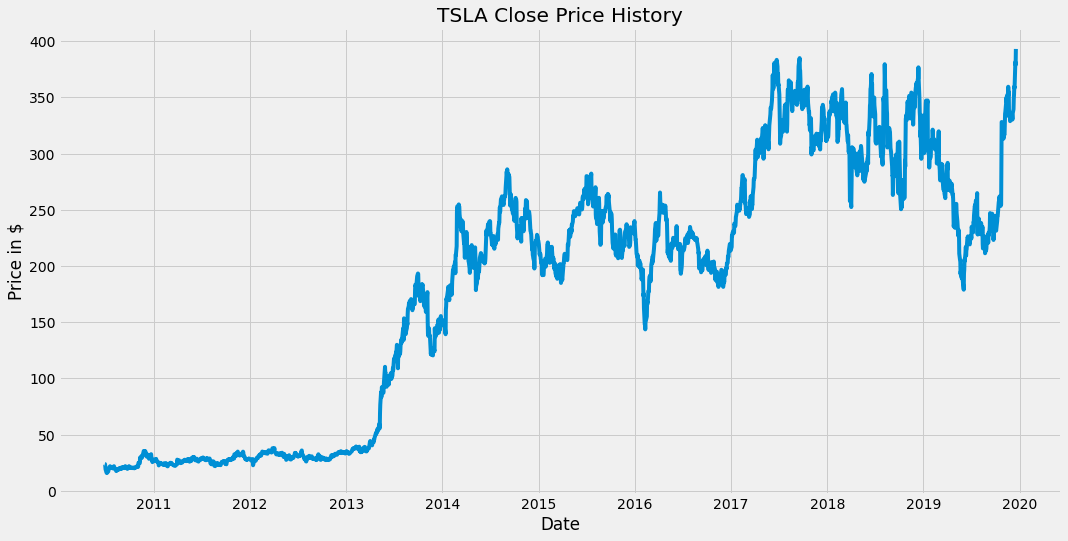

In [274]:
plt.figure(figsize=(16, 8))
title = str (stock_name + " Close Price History")
plt.title(title)
plt.plot(df["Close"])

plt.xlabel("Date")
plt.ylabel("Price in $")


In [0]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
dataset = data.values
'''
Get rows, using about 80% of the data to train, and the other 20% for loss 
reduction
'''

training_data_len = math.ceil(len(dataset) * .8)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [0]:
#create the training data set
#created the scaled training set

train_data = scaled_data[0: training_data_len,:]
#split the data into x_train and y_train

x_train = []
y_train= []

for i in range(past_days, len(train_data)):
  x_train.append(train_data[i-past_days:i,0])
  y_train.append(train_data[i, 0])
  

In [0]:
#convert training datasets to np array
x_train, y_train = np.array(x_train), np.array(y_train)


In [0]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [0]:
#build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [282]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1904/1904 [==============================] - 23s 12ms/step - loss: 0.0025


In [0]:
#create the testing dataset

#create a new array

test_data = scaled_data[training_data_len-past_days: , :]

#create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(past_days, len(test_data)):
  x_test.append(test_data[i-past_days:i, 0])

In [0]:
#convert  the data to a np array
x_test = np.array(x_test)

#
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#get the models predicted price values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


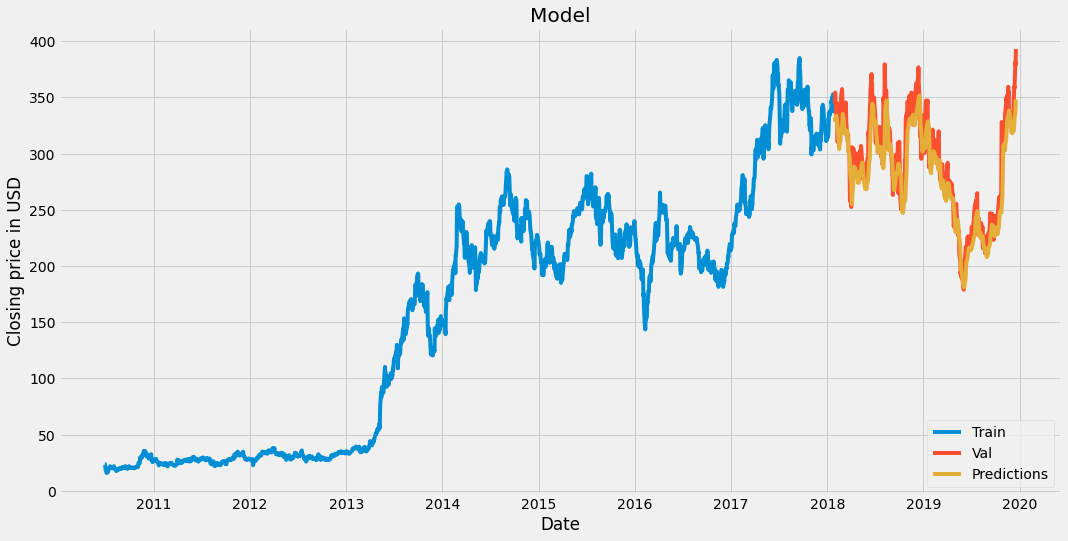

In [286]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("Model")

plt.xlabel("Date")
plt.ylabel("Closing price in USD")

plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [287]:
apple_quote = web.DataReader(stock_name, data_source="yahoo", start=start_date, end=end_date)
new_df = apple_quote.filter(["Close"])
last_60_days = new_df[-past_days:].values

#scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

#reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

pred_price[0][0]

355.32053

In [288]:
apple_quote2 = web.DataReader(stock_name, data_source="yahoo", start=target_date, end=target_date)
print("Actual: " + str(apple_quote2["Close"][0]))
print("Predicted: " + str(pred_price[0][0]))

Actual: 404.0400085449219
Predicted: 355.32053
